In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


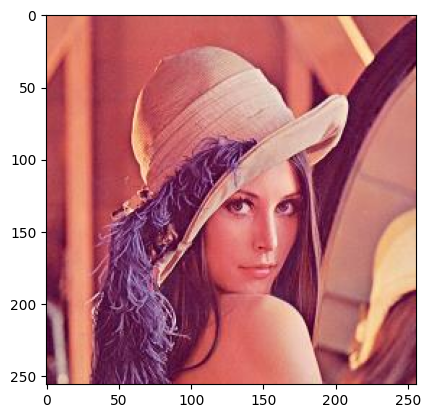

In [4]:
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

(256, 256)


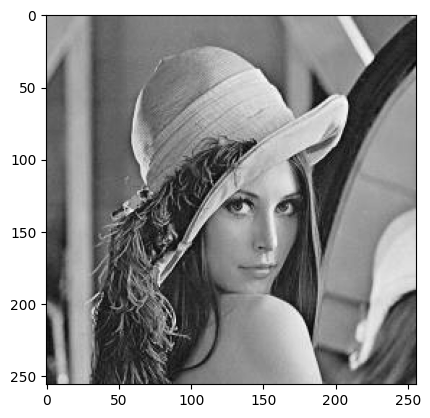

In [6]:
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glmg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(glmg.shape)
plt.imshow(glmg, cmap='gray')

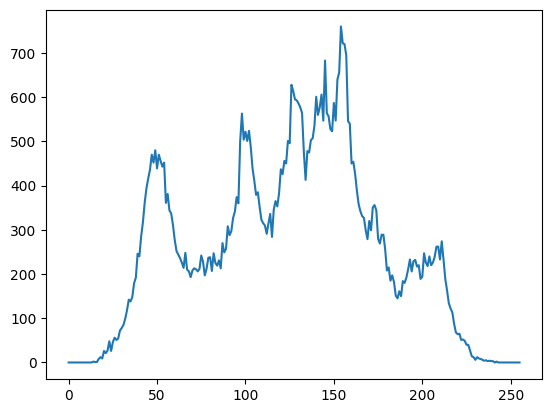

In [7]:
hist = cv2.calcHist([glmg], [0], None, [256], [0,256])
plt.plot(hist)

(256, 256)


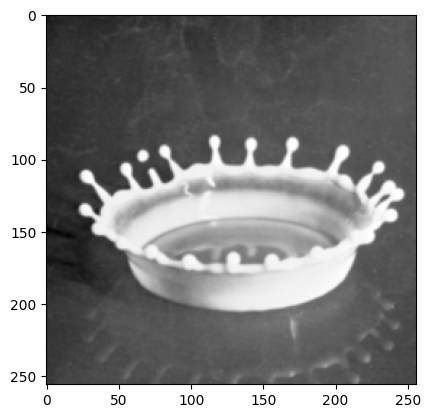

In [8]:
#img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glmg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(glmg.shape)
plt.imshow(glmg, cmap='gray')

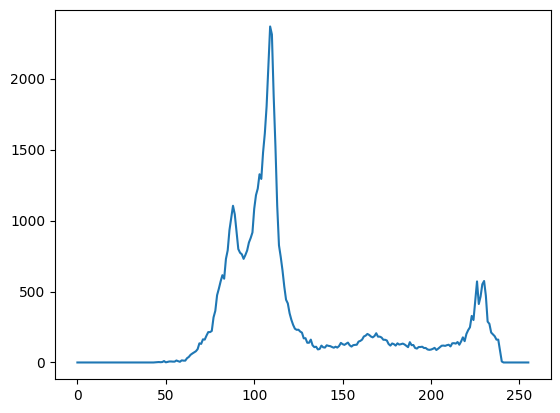

In [9]:
hist = cv2.calcHist([glmg], [0], None, [256], [0,255])
plt.plot(hist)

In [ ]:
gBin = np.zeros((glmg.shape[0], glmg.shape[1]))

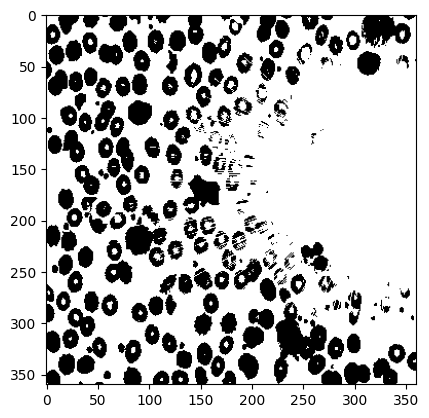

In [ ]:
T = 180

for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
    if (glmg[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

plt.imshow(gBin, cmap='gray')

In [ ]:
T1 = 50
T2 = 0
T0 = 1

outImg  = np.zeros((glmg.shape[0], glmg.shape[1]))


In [ ]:
def threshold_update(h, w, img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(output[h,w] == 255):
        sum1 = sum1 + img[h,w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h,w]
        count2 = count2 + 1


  avg1 = int(sum1/count1)
  avg2 = int(sum2/count2)

  T2 = np.int32(avg1 + avg2)/2
  return T2

In [ ]:
for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
    if (glmg[h,w] > T1):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0

In [ ]:
while True:
  T2 = threshold_update(glmg.shape[0], glmg.shape[1], glmg, outImg, T1)
  if(np.abs(T2 - T1) < T0):
    for h in range(glmg.shape[0]):
      for w in range(glmg.shape[1]):
        if (glmg[h,w] > T2):
          outImg[h,w] = 255
        else:
          outImg[h,w] = 0
    break
  else:
    T1 = T2
    for h in range(glmg.shape[0]):
      for w in range(glmg.shape[1]):
        if (glmg[h,w] > T2):
          outImg[h,w] = 255
        else:
          outImg[h,w] = 0


152.0


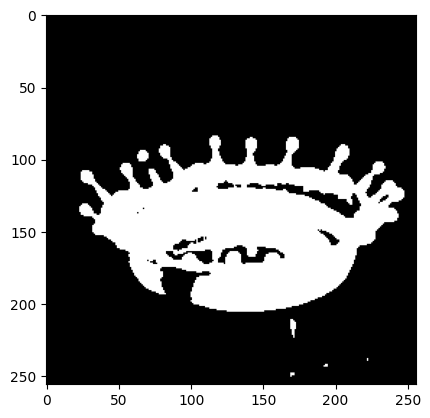

In [ ]:
plt.imshow(outImg, cmap='gray')
print(T2)